Extracting Contents of Zip File.
4 images were scanned.
Performing Optical Character Recognition.
Successful.
Results found in file a-0.png


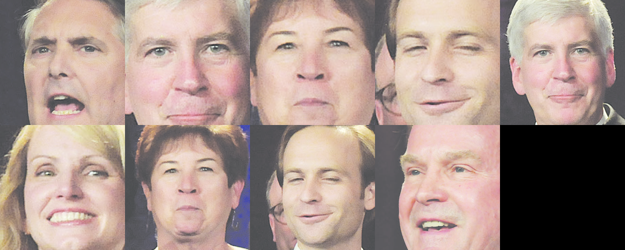

Results found in file a-1.png


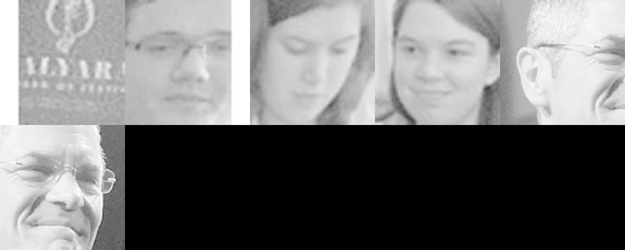

Results found in file a-2.png


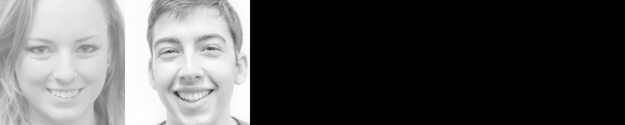

Results found in file a-3.png


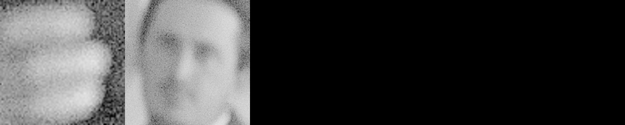

In [19]:
import zipfile
from PIL import Image
import pytesseract
import cv2 as cv

pytesseract.pytesseract.tesseract_cmd = 'C:/Program Files/Tesseract-OCR/tesseract.exe'


face_cascade = cv.CascadeClassifier(cv.data.haarcascades + 'haarcascade_frontalface_default.xml')

print("Extracting Contents of Zip File.")

images = []
with zipfile.ZipFile("small_img.zip","r") as zip_ref:
    for file in zip_ref.infolist():
        unzip = zip_ref.open(file)
        newimage = {}
        newimage['filename'] = file.filename
        newimage['image'] = Image.open(unzip)
        newimage['image'].save(file.filename)
        newimage['facesimages'] = []
        images.append(newimage)
print(len(images),"images were scanned.")

print("Performing Optical Character Recognition.")
for image in images:
    image['text'] = pytesseract.image_to_string(image['image'])   # OCR
    
print("Successful.")

for image in images:
    cvimage = cv.imread(image['filename'])
    gray = cv.cvtColor(cvimage, cv.COLOR_BGR2GRAY)
    image['faces'] = face_cascade.detectMultiScale(gray,1.5)

for image in images:
    for face in image['faces']:
        foundface = image['image'].crop((face[0],face[1],face[0]+face[2],face[1]+face[3]))
        foundface = foundface.resize((250,250))
        image['facesimages'].append(foundface)

def find_faces(faces):
    import math
    from PIL import ImageDraw
    contact_sheet= Image.new('RGB', (1250,math.ceil(len(faces)/5.0)*250))
    x=0
    y=0
    d = ImageDraw.Draw(contact_sheet)
    for face in faces:
        contact_sheet.paste(face, (x, y) )
        if x+face.width >= contact_sheet.width:
            x=0
            y=y+face.height
        else:
            x=x+face.width
    contact_sheet = contact_sheet.resize((int(contact_sheet.width/2),int(contact_sheet.height/2) ))
    return contact_sheet


def find_Person(name):
    for image in images:
        if (not (name in image['text'].split())):
            continue
        print('Results found in file {}'.format(image['filename']))
        if(image['facesimages'] == None or len(image['facesimages']) == 0):
            print('Results found in file {}'.format(image['filename']) + 'But there were no faces in that file!')
        else:
            display(find_faces(image['facesimages']))

find_Person('Mark')

c:\users\yogen\miniconda3\lib\site-packages\cv2\data\
